In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.optimize import fsolve

alpha = 0.9
beta = 0.5
gamma = 0.75
delta = 0.25

In [110]:
a,b,c,d = 1.5,0.05,0.48,0.05

In [73]:
alpha = 1.5 # taux de reproduction des proies
beta = 0.05 # taux de mortalité des proies dû aux prédateurs rencontrés
gamma = 0.48 # taux de mortalité des prédateurs
delta = 0.05 # taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

# Q1)

1 point pas stable et 1 on ne sait pas je crois

# Q2) Représentation visuelle du champ de vecteurs

In [74]:
X=np.linspace(0,100,20)
Y=np.linspace(0,100,20)
Mesh = np.meshgrid(X,Y)
MX=Mesh[0]
MY=Mesh[1]

VX = MX*(alpha-beta*MY)
VY = -MY*(gamma - delta*MX)

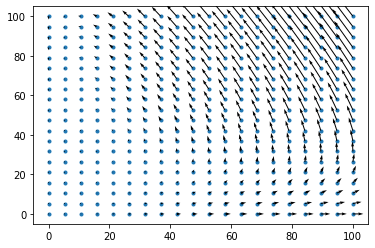

In [75]:
plt.scatter(MX,MY,marker='.')
plt.quiver(MX,MY,VX,VY)

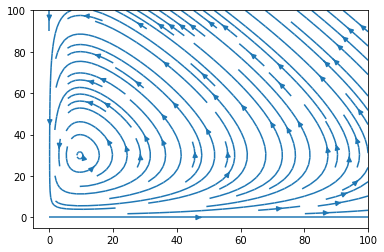

In [76]:
plt.streamplot(MX,MY,VX,VY)

# Q3)

Th de Caushy lipschitz puis je sais pas trop 

# Q4)

dH/dt = 0

La solution initialisé dans R+* reste dans R+* d'après Q3, 
RQ : La solution x(t) ne diverge pas car H(x1,x2) = H(x1(0),x2(0)) pour tout t.

Or

Supposons que la solution (unique) maximale l'est sur un intervalle du type ]a,b["] où a et b sont finie. alors d'apres le th de domaine maximal d'existence (f est continue), soit lim x = +- inf (ce qui est impossible ici) , soit (t,x) tend vers la frontiere de l'ensemble. donc a -> - inf et b - > + inf absurde 

donc la solution est def sur R



# Q5) Représentation des courbes de niveau de H

In [77]:
def H(x1, x2) :
    return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))

<ipython-input-77-2ff7d49f9ff6>:2: RuntimeWarning: divide by zero encountered in log
  return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))


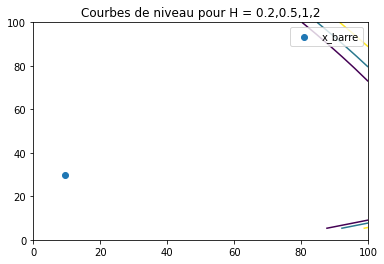

In [130]:
plt.contour(MX,MY,H(MX,MY),[0.0001,0.2,0.5])
xb= (gamma/delta, alpha/beta)
plt.scatter(xb[0],xb[1],label='x_barre')
plt.title("Courbes de niveau pour H = 0.2,0.5,1,2")
plt.legend()

On remarque alors que le point x_barre est stable, en effet ...

# Q6) Fonction Euler explicite

In [60]:
def solve_euler_explicite(f,x0,dt,ti,tf) :
    X=[x0]
    T=[ti]
    t = ti
    while t<tf : 
        x = X[-1] + dt*f(t,X[-1])
        X.append(x)
        t=t+dt
        T.append(t)
    return(T,X)

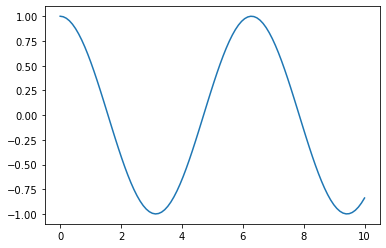

In [62]:
X=np.linspace(0,10,100)
Y=np.cos(X)
plt.plot(X,Y)

In [63]:
def f(t,X):
    return(np.array([X[1],-X[0]]))
dt=10**(-3)
Z=solve_euler_explicite(f,[1,0],dt,0,10)

YE=[Z[1][i][0] for i in range(0,len(Z[1])) ]

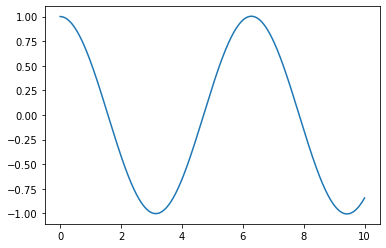

In [64]:
plt.plot(Z[0],YE)

Convergence de la méthode : 

In [65]:
DT = np.arange(10**(-3),10**(-1),10**(-3)/2)
len(DT)

198

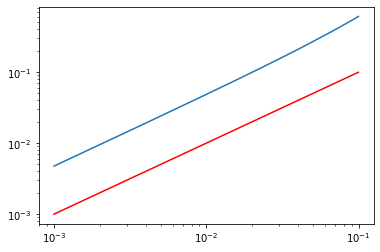

In [66]:
ERR=[]
for dt in DT :
    Z=solve_euler_explicite(f,[1,0],dt,0,10)
    YE=[Z[1][i][0] for i in range(0,len(Z[1])) ]
    
    Eps = max(abs(np.cos(Z[0]) - YE))
    ERR.append(Eps)
    
plt.loglog(DT,ERR)
plt.loglog(DT,DT,color='r') #On observe bien un coefficient directeur identique, égale à 1

# Q7)

In [104]:
def f_Lotka(t,X):
    return(np.array([X[0]*(alpha-beta*X[1]),
                     -X[1]*(gamma-delta*X[0])]))

In [101]:
dt=10**(-3)

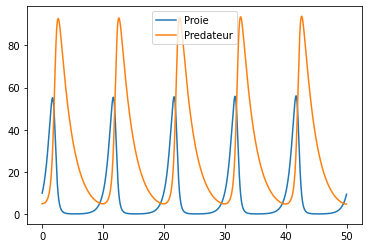

In [120]:
Z_Lotka = solve_euler_explicite(f_Lotka,[10,5],dt,0,50)
Proie = [Z_Lotka[1][i][0] for i in range(0,len(Z_Lotka[1]))]
Predateur = [Z_Lotka[1][i][1] for i in range(0,len(Z_Lotka[1]))]
plt.plot(Z_Lotka[0],Proie,label='Proie')
plt.plot(Z_Lotka[0],Predateur,label='Predateur')
plt.legend()

Tracer de la fonction H

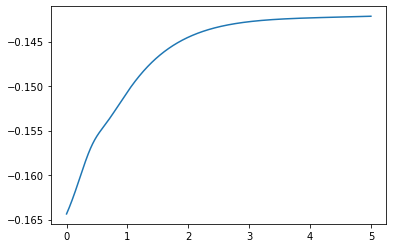

In [103]:
H_Lotka = H(np.array(Proie),np.array(Predateur))
plt.plot(Z_Lotka[0],H_Lotka) # La fonction H dépend de t ... => Euler exp ne fonctionne pas

# Q8)

In [18]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t=t0
    T=[t]
    X=[x0]
    iter=0
    while t<tf and iter<=itermax :
        temp = fsolve(lambda y:y-X[-1]-dt*f(t+dt,X[-1]),[0.1,0.1])
        X.append(temp)
        t=t+dt
        T.append(t)
        iter = iter+1
    return(T,X)

Résolution pour le système d²x/dt² + x = 0 : 

In [19]:
ZZ = solve_euler_implicit(f,[1,0],dt,0,10,8000)

In [20]:
Y=[ZZ[1][i][0] for i in range(0,len(ZZ[1]))]

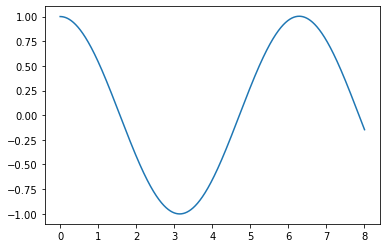

In [21]:
plt.plot(ZZ[0],Y)

Application aux équations de Lotka :

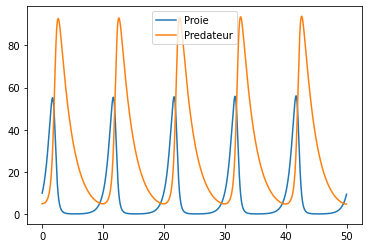

In [125]:
Z_Lotka_imp = solve_euler_implicit(f_Lotka,[10,5],dt,0,50,100000)
Proie_imp = [Z_Lotka_imp[1][i][0] for i in range(0,len(Z_Lotka_imp[1]))]
Predateur_imp = [Z_Lotka_imp[1][i][1] for i in range(0,len(Z_Lotka_imp[1]))]

plt.plot(Z_Lotka_imp[0],Proie_imp,label='Proie')
plt.plot(Z_Lotka_imp[0],Predateur_imp,label='Predateur')
plt.legend()

On remarque cette fois ci 

# Q9)

H(x) = H(x(0)) car dH/dt = 0 

# Q10)

# Q11)

Pour garantir la stabilité de H